 # Лабораторная работа №1

## Задание 1

Игроки А и В записывают цифры 1 и 2. Игра состоит в том, что, кроме своей цифры каждый игрок записывает еще и ту цифру, которую по его мнению, записал соперник. Если оба игрока угадали или оба ошиблись, то партия заканчивается вничью; если же угадал только один, то он получает столько очков, какова сумма записанных им цифр. 

### Платежная матрица игры
\begin{equation}
  A = \begin{bmatrix}
    0 & 2 & -3 & 0 \\
    -2 &  0 &  0  & 3 \\
    3 & 0 & 0 & -4 \\
    0 &-3 & 4 & 0
  \end{bmatrix}
\end{equation}

In [135]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [136]:
%matplotlib notebook

In [137]:
A = np.array([[0, 2, -3, 0],
              [-2, 0, 0, 3],
              [3, 0, 0, -4],
              [0, -3, 4, 0]])

Точная нижняя цена игры: {{np.max(np.min(A, axis = 0))}}

Точная верхняя цена игры {{np.min(np.max(A, axis = 1))}}

In [138]:
x = linprog(-np.ones(4), A+4, np.ones(4))
v = -1/x['fun']
p = x['x']*v

In [139]:
x = linprog(np.ones(4), -A.T-4, -np.ones(4))
v = 1/x['fun']
q = x['x']*v

In [140]:
v_ = np.sum((A*np.array([0. , 0.6, 0.4, 0. ])).T*np.array([0. , 0.57142857, 0.42857143, 0. ]))

Цена игры: {{v_}}

Оптимальная стратегия игрока A: {{p}}

Оптимальная стратегия игрока B: {{q}}

In [141]:
def map_func(a):
    return (a[0]-1)*2+a[1]-1

def game1(A, a, b, av, bv):
    av += A[map_func(b),map_func(a)]
    bv -= A[map_func(b),map_func(a)]
    return av, bv

### Случайный выбор стратегий

In [142]:
c = [(1,1), (1,2), (2,1), (2,2)]
A_win = 0
for t in range(100):
    av, bv = 0, 0
    for i in range(1000):
        av, bv = game1(A, c[np.random.randint(0,3)], c[np.random.randint(0,3)], av, bv)
    A_win += av>0
A_win

50

### Второй игрок использует другую стратегию

In [143]:
c = [(1,1), (1,2), (2,1), (2,2)]
A_win = 0
def f():
    return int(np.random.rand(1)>0.6)
    
for t in range(100):
    av, bv = 0, 0
    for i in range(1000):
        av, bv = game1(A, c[np.random.randint(0,3)], c[f()], av, bv)
    A_win += av>0
A_win

0

### Оптимальные стратегии

In [144]:
c = [(1,1), (1,2), (2,1), (2,2)]
A_win = 0
def f():
    return int(np.random.rand(1)>0.6)
    
for t in range(100):
    av, bv = 0, 0
    for i in range(1000):
        av, bv = game1(A, c[f()], c[f()], av, bv)
    A_win += av>0
A_win

43

## Задание 2

Конкурирующие фирмы А и В производят однородный сезонный товар, пользующийся спросом в течение n единиц времени. Доход от продажи товара в единицу времени составляет С ден. ед. Фирма В, будучи более состоятельной, в ходе конкурентной борьбы стремится вытеснить фирму А с рынка сбыта, способствуя своими действиями минимизации ее дохода, не считаясь при этом с временными потерями части своего дохода в надежде наверстать упущенное в будущем. Действующее законодательство не позволяет использовать для этого заведомое занижение цены на товар (прибегать к демпинговым ценам). Единственным допустимым способом достижения своей цели для фирмы В (как и для фирмы А в целях защиты своих интересов на рынке сбыта) остается повышение качества товара и надлежащий выбор момента времени поставки его на рынок сбыта. Уровень спроса на товар зависит от его качества, и в данный момент реализуется тот товар, качество которого выше. Повышение же качества требует дополнительных затрат времени на совершенствование технологии его изготовления и переналадку оборудования. Поэтому будем предполагать, что качество товара тем выше, чем позже он поступает на рынок.

Таким образом стратегии для фирм А и В связаны с выбором моментов i и j предложения своего товара на рынок сбыта. А, выбирая момент i, стремится максимизировать свой доход. В преследует прямо противоположную цель – минимизировать доход игрока А. 

Составить платежную матрицу игры для n=5 и С=100.

### Платежная матрица игры


$$ A = \begin{bmatrix}
   500 & 400 & 300 & 200 & 100 \\
    100 & 400 & 300 & 200 & 100 \\
    200 & 100 & 300 & 200 & 100 \\
    300 & 200 & 100 & 200 & 100 \\
    400 & 300 & 200 & 100 & 100
   \end{bmatrix}$$

In [145]:
A2 = np.array([[500, 400, 300, 200, 100],
               [100, 400, 300, 200, 100],
               [200, 100, 300, 200, 100],
               [300, 200, 100, 200, 100],
               [400, 300, 200, 100, 100]])

Точная нижняя цена игры: {{np.max(np.min(A2, axis = 0))}}

Точная верхняя цена игры {{np.min(np.max(A2, axis = 1))}}

In [146]:
x = linprog(np.ones(5), -A2, -np.ones(5))
v = 1/x['fun']
p = x['x']*v

In [147]:
x = linprog(-np.ones(5), A2.T, np.ones(5))
v = -1/x['fun']
q = x['x']*v

In [148]:
v_ = np.sum((A2*p).T*q)

Цена игры: {{v_}}

Оптимальная стратегия игрока A: {{p}}

Оптимальная стратегия игрока B: {{q}}

## Задание 3.


Задача 3. Для отопления коттеджа в зимний период используется уголь, цена на который зависит от времени года и характера зимы. Летом тонна угля стоит 7.5 ден. ед., в мягкую зиму – 8.5, в обычную – 9.0, а в холодную – 9.5. Расход угля в отопительный сезон полностью определяется характером зимы: на мягкую зиму достаточно 6 тонн, на обычную требуется 7, а в холодную расходуется 8. Арендатор может запасать топливо с лета и, в случае необходимости, пополнять его зимой. Однако продать неиспользованный уголь возможности не будет.

Составить платежную матрицу игры арендатора с “природой”.


### Платежная матрица игры

$$ A = \begin{matrix}
    - & мягкая & обычная & холодная \\
    ЛЛ & 15 & 15 & 15 \\
    ЛО & 7.5 & 16.5 & 16.5 \\ 
    ЛХ & 7.5 & 7.5 & 17 \\
    OO & 0 & 18 & 18 \\
    ОХ & 0 & 9 & 18.5 \\
    \end{matrix}$$

In [149]:
A3 = np.array([[15, 15, 15],
               [7.5, 16.5, 16.5],
               [7.5, 7.5, 17],
               [0, 18, 18],
               [0, 9, 18.5]])

Точная нижняя цена игры: {{np.max(np.min(A3, axis = 0))}}

Точная верхняя цена игры {{np.min(np.max(A3, axis = 1))}}

In [150]:
x = linprog(np.ones(5), -A3.T, -np.ones(3))
v = 1/x['fun']
p = x['x']*v

In [151]:
x = linprog(-np.ones(3), A3, np.ones(5))
v = -1/x['fun']
q = x['x']*v

Оптимальная стратегия игрока A: {{p}}

Оптимальная стратегия игрока B: {{q}}

### Задание 4

#### Единственное решение

<IPython.core.display.Javascript object>


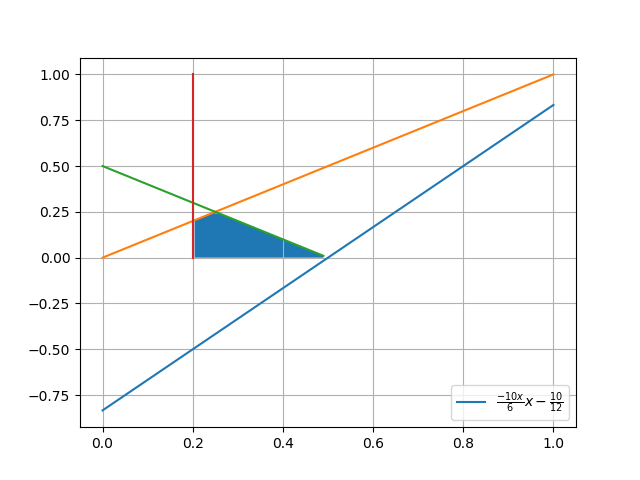

     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.5, 0. , 0.3])
  status: 0
 success: True
       x: array([0.5, 0. ])

In [218]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.5-x
f3 = 0.2

plt.grid()
plt.plot(x, 10*x/6-10/12)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[np.logical_and(f3<=x, x<=0.5)],
                         0,
                         np.min(np.array([x[np.logical_and(f3 <x, x<=0.5)],
                         (1/2-x)[np.logical_and(0.2<=x, x<=0.5)]]), axis=0));
plt.legend([r'$\frac{-10x}{6}x-\frac{10}{12}$'])
linprog([-1, -0.6], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.2])

#### бесконечное ножество решений

<IPython.core.display.Javascript object>


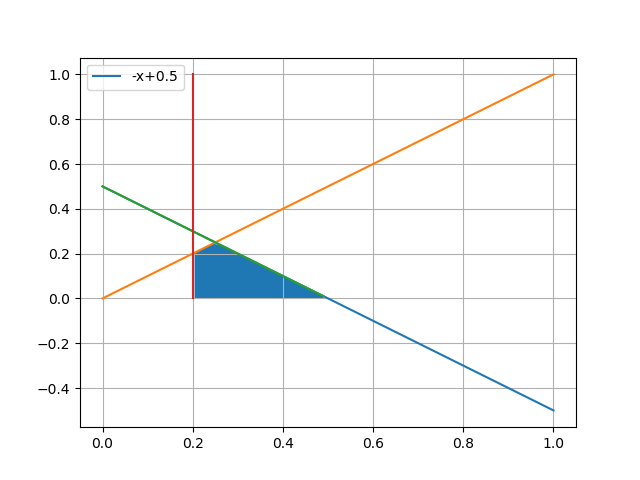

     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.  , 0.  , 0.05])
  status: 0
 success: True
       x: array([0.25, 0.25])

In [244]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.5-x
f3 = 0.2

plt.grid()
plt.plot(x, -x+0.5)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[np.logical_and(f3<x, x<0.5)],
                         0,
                         np.min(np.array([x[np.logical_and(f3 <x, x<0.5)],
                         (1/2-x)[np.logical_and(0.2<x, x<0.5)]]), axis=0));
plt.legend(['-x+0.5'])
linprog([-1, -1], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.2])

####  допустимая область пуста

<IPython.core.display.Javascript object>


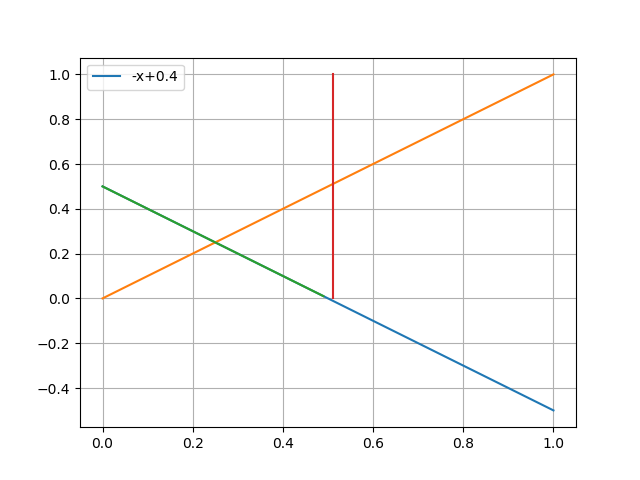

     fun: 0.010000000000000009
 message: 'Optimization failed. Unable to find a feasible starting point.'
     nit: 1
  status: 2
 success: False
       x: nan

In [243]:
fig = plt.figure()
x = np.linspace(0, 1, 50)

f1 = x
f2 = 0.5-x
f3 = 0.51

plt.grid()
plt.plot(x, -x+0.5)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
plt.legend(['-x+0.4'])
linprog([-1, -1], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.51])

#### функция не ограничена в заданной области

<IPython.core.display.Javascript object>


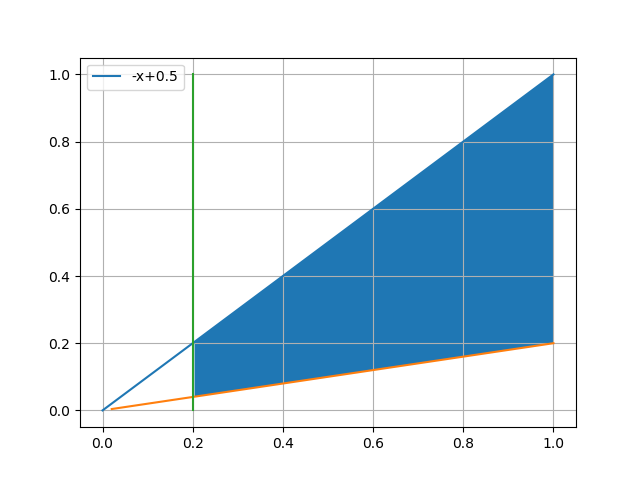

     fun: -1.25
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 3
   slack: array([0.   , 0.   , 0.425])
  status: 3
 success: False
       x: array([0.625, 0.625])

In [270]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.2*x
f3 = 0.2

plt.grid()
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[x>=f3],
                         f1[x>=f3],
                         f2[x>=f3]);
plt.legend(['-x+0.5'])
linprog([-1, -1], [[-1, 1], [-0.2, 1], [-1, 0]], [0, 0.5, -0.2])